In [1]:
import pandas as pd
import seaborn as sns
import missingno as mino
import matplotlib.pyplot as plt

그래프 스타일 변경

In [131]:
plt.style.available # 가능한 스타일들

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

In [2]:
plt.style.use('ggplot')

-------------------------------------------------------------------------------------------------

In [3]:
data = pd.read_excel('2018_sang.xlsx')

In [4]:
data

,광역시도,시군구,업종대분류,업종중분류,1년미만,1~2년,2~3년,3~5년,5년 이상
0,서울특별시,종로구,관광/여가/오락,연극/영화/극장,1.0,2.0,42.0,39.0,16.0
1,서울특별시,종로구,관광/여가/오락,전시/관람,0.0,6.0,18.0,35.0,44.0
2,서울특별시,종로구,관광/여가/오락,PC/오락/당구/볼링등,0.0,5.0,12.0,86.0,20.0
3,서울특별시,종로구,관광/여가/오락,경마/경륜/성인오락,0.0,1.0,1.0,1.0,2.0
4,서울특별시,종로구,관광/여가/오락,스포츠/운동,0.0,0.0,1.0,0.0,0.0
5,서울특별시,종로구,관광/여가/오락,요가/단전/마사지,0.0,1.0,6.0,18.0,15.0
6,서울특별시,종로구,관광/여가/오락,놀이/여가/취미,0.0,0.0,4.0,6.0,2.0
7,서울특별시,종로구,관광/여가/오락,무도/유흥/가무,1.0,7.0,10.0,75.0,14.0
8,서울특별시,종로구,부동산,부동산중개,33.0,20.0,47.0,60.0,110.0
9,서울특별시,종로구,부동산,평가/개발/관리,2.0,3.0,11.0,3.0,107.0


데이터 원형 보존

In [5]:
data_raw = data.copy()

In [6]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20625 entries, 0 to 20624
Data columns (total 9 columns):
광역시도     20625 non-null object
시군구      20625 non-null object
업종대분류    20625 non-null object
업종중분류    20625 non-null object
1년미만     20617 non-null float64
1~2년     20617 non-null float64
2~3년     20617 non-null float64
3~5년     20617 non-null float64
5년 이상    20617 non-null float64
dtypes: float64(5), object(4)
memory usage: 1.4+ MB


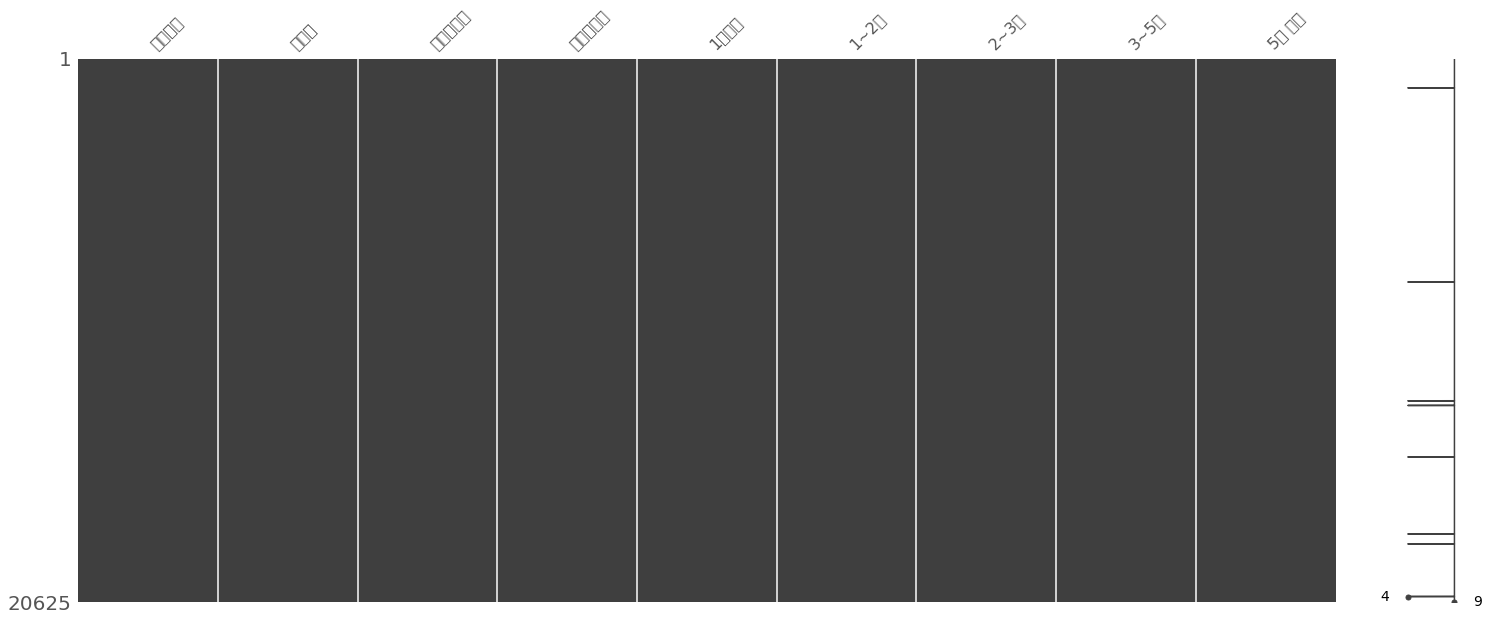

In [7]:
# 한글을 지원하지 않으므로 다른 처리를 해야 되는데 후에 할 예정
mino.matrix(data_raw);

In [8]:
data_raw.isna().all() # 하나라도 false면 false

광역시도     False
시군구      False
업종대분류    False
업종중분류    False
1년미만     False
1~2년     False
2~3년     False
3~5년     False
5년 이상    False
dtype: bool

In [9]:
data_raw.isna().any()

광역시도     False
시군구      False
업종대분류    False
업종중분류    False
1년미만      True
1~2년      True
2~3년      True
3~5년      True
5년 이상     True
dtype: bool

미싱 데이터 제거

In [10]:
data_raw_na = data_raw.dropna()

In [11]:
data_raw_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20617 entries, 0 to 20624
Data columns (total 9 columns):
광역시도     20617 non-null object
시군구      20617 non-null object
업종대분류    20617 non-null object
업종중분류    20617 non-null object
1년미만     20617 non-null float64
1~2년     20617 non-null float64
2~3년     20617 non-null float64
3~5년     20617 non-null float64
5년 이상    20617 non-null float64
dtypes: float64(5), object(4)
memory usage: 1.6+ MB


tidy 데이터로 전환

In [12]:
data = data_raw_na.melt(data_raw_na.columns[:4], var_name='년', value_name='수')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103085 entries, 0 to 103084
Data columns (total 6 columns):
광역시도     103085 non-null object
시군구      103085 non-null object
업종대분류    103085 non-null object
업종중분류    103085 non-null object
년        103085 non-null object
수        103085 non-null float64
dtypes: float64(1), object(5)
memory usage: 4.7+ MB


In [14]:
data['수'].astype('int64')

0           1
1           0
2           0
3           0
4           0
5           0
6           0
7           1
8          33
9           2
10          0
11          1
12          0
13          3
14          2
15          3
16          0
17          0
18          5
19          1
20          0
21          1
22          7
23          0
24          5
25          0
26          6
27          0
28          1
29         54
         ... 
103055     29
103056     30
103057      6
103058     51
103059     72
103060    185
103061      6
103062      3
103063    118
103064     28
103065    261
103066    653
103067     19
103068     52
103069    108
103070    137
103071    152
103072      8
103073     15
103074     16
103075     34
103076     21
103077      0
103078      3
103079    124
103080     22
103081     18
103082     28
103083    115
103084      3
Name: 수, Length: 103085, dtype: int64

In [15]:
data['수'] = data['수'].astype('int64')

수가 0인 것을 삭제

In [16]:
data['수'] == 0

0         False
1          True
2          True
3          True
4          True
5          True
6          True
7         False
8         False
9         False
10         True
11        False
12         True
13        False
14        False
15        False
16         True
17         True
18        False
19        False
20         True
21        False
22        False
23         True
24        False
25         True
26        False
27         True
28        False
29        False
          ...  
103055    False
103056    False
103057    False
103058    False
103059    False
103060    False
103061    False
103062    False
103063    False
103064    False
103065    False
103066    False
103067    False
103068    False
103069    False
103070    False
103071    False
103072    False
103073    False
103074    False
103075    False
103076    False
103077     True
103078    False
103079    False
103080    False
103081    False
103082    False
103083    False
103084    False
Name: 수, Length: 103085,

In [17]:
data = data[data['수'] != 0]

aggregation 분석

In [18]:
data.groupby(['광역시도']).count()

,시군구,업종대분류,업종중분류,년,수
광역시도,,,,,
강원도,5691,5691,5691,5691,5691
경기도,12257,12257,12257,12257,12257
경상남도,5605,5605,5605,5605,5605
경상북도,6664,6664,6664,6664,6664
광주광역시,2058,2058,2058,2058,2058
대구광역시,3112,3112,3112,3112,3112
대전광역시,2040,2040,2040,2040,2040
부산광역시,5754,5754,5754,5754,5754
서울특별시,9933,9933,9933,9933,9933


In [20]:
data.iloc[:,-3]

0              연극/영화/극장
7              무도/유흥/가무
8                 부동산중개
9              평가/개발/관리
11                부동산임대
13               기타서비스업
14                광고/인쇄
15           예식/의례/관혼상제
18               법무세무회계
19               행사/이벤트
21                 주택수리
22                   사진
24             대중목욕탕/휴게
26            개인/가정용품수리
28                장례/묘지
29              이/미용/건강
30             세탁/가사서비스
31             운송/배달/택배
32           가정/주방/인테리어
33              책/서적/도서
35              건강/미용식품
37             의약/의료품소매
38              음/식료품소매
39           페인트/유리제품소매
40         철물/난방/건설자재소매
41            선물/팬시/기념품
42        예술품/골동품/수석/분재
43            사무/문구/컴퓨터
45             시계/귀금속소매
46           가방/신발/액세서리
              ...      
103054        모텔/여관/여인숙
103055           실외운동시설
103056           실내운동시설
103057           운영관리시설
103058               중식
103059          제과제빵떡케익
103060            기타음식업
103061               부페
103062          음식배달서비스
103063           닭/오리요리
103064          

In [19]:
data[data.iloc[:,-3] == '연극/영화/극장'].groupby(['광역시도']).count()

,시군구,업종대분류,업종중분류,년,수
광역시도,,,,,
강원도,34,34,34,34,34
경기도,109,109,109,109,109
경상남도,41,41,41,41,41
경상북도,40,40,40,40,40
광주광역시,18,18,18,18,18
대구광역시,27,27,27,27,27
대전광역시,17,17,17,17,17
부산광역시,42,42,42,42,42
서울특별시,91,91,91,91,91


In [152]:
data

,광역시도,시군구,업종대분류,업종중분류,년,수
0,서울특별시,종로구,관광/여가/오락,연극/영화/극장,1년미만,1
7,서울특별시,종로구,관광/여가/오락,무도/유흥/가무,1년미만,1
8,서울특별시,종로구,부동산,부동산중개,1년미만,33
9,서울특별시,종로구,부동산,평가/개발/관리,1년미만,2
11,서울특별시,종로구,부동산,부동산임대,1년미만,1
13,서울특별시,종로구,생활서비스,기타서비스업,1년미만,3
14,서울특별시,종로구,생활서비스,광고/인쇄,1년미만,2
15,서울특별시,종로구,생활서비스,예식/의례/관혼상제,1년미만,3
18,서울특별시,종로구,생활서비스,법무세무회계,1년미만,5
19,서울특별시,종로구,생활서비스,행사/이벤트,1년미만,1


SAC 기법 : count함수를 실행시키고(Apply) grouby로 묶어준다.(combine)
- 파이썬에서는 reduction이 있으므로 Combine을 안 해줘도 됨.

In [24]:
t = data[(data['광역시도'] == '서울특별시') & (data['업종대분류'] == '부동산')].groupby(['시군구','업종중분류'])

iterator는 아니지만 iter와 getitem이 있으므로 iterable이다.(순회가능)

In [25]:
dir(t)

['__bytes__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_accessors',
 '_add_numeric_operations',
 '_agg_examples_doc',
 '_agg_see_also_doc',
 '_aggregate',
 '_aggregate_generic',
 '_aggregate_item_by_item',
 '_aggregate_multiple_funcs',
 '_apply_filter',
 '_apply_to_column_groupbys',
 '_apply_whitelist',
 '_assure_grouper',
 '_block_agg_axis',
 '_bool_agg',
 '_builtin_table',
 '_choose_path',
 '_concat_objects',
 '_constructor',
 '_cumcount_array',
 '_cython_agg_blocks',
 '_cython_agg_general',
 '_cython_table',
 '_cython_transform',
 '_decide_output_index',
 '_def_str',
 '_define_paths',
 

In [26]:
import inspect

In [27]:
print(inspect.getsource(pd.Grouper))

class Grouper(object):
    """
    A Grouper allows the user to specify a groupby instruction for a target
    object

    This specification will select a column via the key parameter, or if the
    level and/or axis parameters are given, a level of the index of the target
    object.

    These are local specifications and will override 'global' settings,
    that is the parameters axis and level which are passed to the groupby
    itself.

    Parameters
    ----------
    key : string, defaults to None
        groupby key, which selects the grouping column of the target
    level : name/number, defaults to None
        the level for the target index
    freq : string / frequency object, defaults to None
        This will groupby the specified frequency if the target selection
        (via key or level) is a datetime-like object. For full specification
        of available frequencies, please see `here
        <http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-alias

In [28]:
from collections import Counter

In [29]:
Counter('aaaabbbc')

Counter({'a': 4, 'b': 3, 'c': 1})

In [30]:
for i,j in t:
    print(i,j)

('강남구', '부동산관련서비스')         광역시도  시군구 업종대분류     업종중분류      년    수
43286  서울특별시  강남구   부동산  부동산관련서비스   2~3년    2
63903  서울특별시  강남구   부동산  부동산관련서비스   3~5년    6
84520  서울특별시  강남구   부동산  부동산관련서비스  5년 이상  110
('강남구', '부동산임대')         광역시도  시군구 업종대분류  업종중분류      년    수
2055   서울특별시  강남구   부동산  부동산임대   1년미만    6
22672  서울특별시  강남구   부동산  부동산임대   1~2년    5
43289  서울특별시  강남구   부동산  부동산임대   2~3년   68
63906  서울특별시  강남구   부동산  부동산임대   3~5년   79
84523  서울특별시  강남구   부동산  부동산임대  5년 이상  168
('강남구', '부동산중개')         광역시도  시군구 업종대분류  업종중분류      년    수
2053   서울특별시  강남구   부동산  부동산중개   1년미만   68
22670  서울특별시  강남구   부동산  부동산중개   1~2년   63
43287  서울특별시  강남구   부동산  부동산중개   2~3년  473
63904  서울특별시  강남구   부동산  부동산중개   3~5년  368
84521  서울특별시  강남구   부동산  부동산중개  5년 이상  702
('강남구', '분양')         광역시도  시군구 업종대분류 업종중분류      년    수
2054   서울특별시  강남구   부동산    분양   1년미만    1
22671  서울특별시  강남구   부동산    분양   1~2년    2
43288  서울특별시  강남구   부동산    분양   2~3년  207
63905  서울특별시  강남구   부동산    분양   3~5년   44
84522  서울특별시  강남구   부동

83405  서울특별시  노원구   부동산    분양  5년 이상  1
('노원구', '평가/개발/관리')         광역시도  시군구 업종대분류     업종중분류      년   수
42169  서울특별시  노원구   부동산  평가/개발/관리   2~3년   7
62786  서울특별시  노원구   부동산  평가/개발/관리   3~5년   5
83403  서울특별시  노원구   부동산  평가/개발/관리  5년 이상  71
('도봉구', '부동산관련서비스')         광역시도  시군구 업종대분류     업종중분류      년   수
83314  서울특별시  도봉구   부동산  부동산관련서비스  5년 이상  89
('도봉구', '부동산임대')         광역시도  시군구 업종대분류  업종중분류      년   수
21465  서울특별시  도봉구   부동산  부동산임대   1~2년   1
42082  서울특별시  도봉구   부동산  부동산임대   2~3년   6
62699  서울특별시  도봉구   부동산  부동산임대   3~5년   7
83316  서울특별시  도봉구   부동산  부동산임대  5년 이상  12
('도봉구', '부동산중개')         광역시도  시군구 업종대분류  업종중분류      년    수
845    서울특별시  도봉구   부동산  부동산중개   1년미만    9
21462  서울특별시  도봉구   부동산  부동산중개   1~2년   29
42079  서울특별시  도봉구   부동산  부동산중개   2~3년   14
62696  서울특별시  도봉구   부동산  부동산중개   3~5년   16
83313  서울특별시  도봉구   부동산  부동산중개  5년 이상  133
('도봉구', '분양')         광역시도  시군구 업종대분류 업종중분류      년  수
42081  서울특별시  도봉구   부동산    분양   2~3년  4
83315  서울특별시  도봉구   부동산    분양  5년 이상  3
('도봉구', '평가/개발

83132  서울특별시  성북구   부동산    분양  5년 이상   2
('성북구', '평가/개발/관리')         광역시도  시군구 업종대분류     업종중분류      년   수
21279  서울특별시  성북구   부동산  평가/개발/관리   1~2년   2
41896  서울특별시  성북구   부동산  평가/개발/관리   2~3년  10
62513  서울특별시  성북구   부동산  평가/개발/관리   3~5년   4
83130  서울특별시  성북구   부동산  평가/개발/관리  5년 이상  85
('송파구', '부동산관련서비스')         광역시도  시군구 업종대분류     업종중분류      년   수
22764  서울특별시  송파구   부동산  부동산관련서비스   1~2년   1
63998  서울특별시  송파구   부동산  부동산관련서비스   3~5년   2
84615  서울특별시  송파구   부동산  부동산관련서비스  5년 이상  91
('송파구', '부동산임대')         광역시도  시군구 업종대분류  업종중분류      년   수
2149   서울특별시  송파구   부동산  부동산임대   1년미만   2
22766  서울특별시  송파구   부동산  부동산임대   1~2년   1
43383  서울특별시  송파구   부동산  부동산임대   2~3년   5
64000  서울특별시  송파구   부동산  부동산임대   3~5년  13
84617  서울특별시  송파구   부동산  부동산임대  5년 이상  41
('송파구', '부동산중개')         광역시도  시군구 업종대분류  업종중분류      년    수
2146   서울특별시  송파구   부동산  부동산중개   1년미만   45
22763  서울특별시  송파구   부동산  부동산중개   1~2년   25
43380  서울특별시  송파구   부동산  부동산중개   2~3년   64
63997  서울특별시  송파구   부동산  부동산중개   3~5년  222
84614  서울특별시 

카운터와 value_counts
- 똑같은데 더 이쁘게 보여주냐 아니냐의 차이

In [160]:
data['업종대분류'].value_counts()

소매          23597
생활서비스       15738
음식          14909
학문/교육       10891
관광/여가/오락     5323
부동산          3331
숙박           3095
스포츠          2230
Name: 업종대분류, dtype: int64

value_counts()의 단점은 변경시킬 수 없다.. 시리즈의 값을 보여주는 것이기 때문에.

In [161]:
ss = data['업종대분류']

normalize 를 사용하면 비율을 보여준다.

In [162]:
ss.value_counts(normalize=True)

소매          0.298266
생활서비스       0.198928
음식          0.188450
학문/교육       0.137662
관광/여가/오락    0.067283
부동산         0.042104
숙박          0.039121
스포츠         0.028187
Name: 업종대분류, dtype: float64

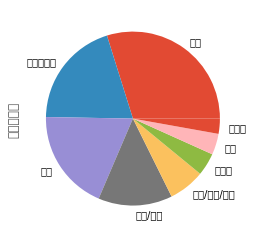

In [163]:
ss.value_counts(normalize=True).plot.pie();

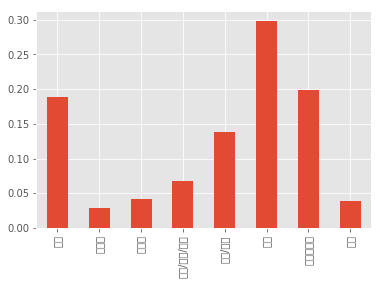

In [164]:
ss.value_counts(True, False).plot.bar();

In [165]:
Counter(data['업종대분류'])

Counter({'관광/여가/오락': 5323,
         '부동산': 3331,
         '생활서비스': 15738,
         '소매': 23597,
         '숙박': 3095,
         '스포츠': 2230,
         '음식': 14909,
         '학문/교육': 10891})

In [31]:
x = Counter(data['업종대분류'])

In [32]:
x.items()

dict_items([('관광/여가/오락', 5323), ('부동산', 3331), ('생활서비스', 15738), ('소매', 23597), ('숙박', 3095), ('스포츠', 2230), ('음식', 14909), ('학문/교육', 10891)])

In [33]:
s = x.most_common()

In [34]:
s

[('소매', 23597),
 ('생활서비스', 15738),
 ('음식', 14909),
 ('학문/교육', 10891),
 ('관광/여가/오락', 5323),
 ('부동산', 3331),
 ('숙박', 3095),
 ('스포츠', 2230)]

sort는 설명에 in place가 있다.

In [170]:
s.sort()

In [171]:
s

[('관광/여가/오락', 5323),
 ('부동산', 3331),
 ('생활서비스', 15738),
 ('소매', 23597),
 ('숙박', 3095),
 ('스포츠', 2230),
 ('음식', 14909),
 ('학문/교육', 10891)]

값으로 정렬

In [172]:
s.sort(key=lambda t:t[1])

In [173]:
s

[('스포츠', 2230),
 ('숙박', 3095),
 ('부동산', 3331),
 ('관광/여가/오락', 5323),
 ('학문/교육', 10891),
 ('음식', 14909),
 ('생활서비스', 15738),
 ('소매', 23597)]

In [185]:
t = data[(data['광역시도'] == '서울특별시') | (data['광역시도'] == '강원도') & (data['업종대분류'] == '부동산')].groupby(['시군구','업종중분류'])

or가 나오면 isin 테크닉을 사용하면 된다.(isin 함수는 넘파이에 있다)
- 여러개의 조건이 있을 때 사용하면 된다.
- isin(조건)
- 조건에 해당하는 것은 True, 아닌것은 False로 반환하는 predicate 함수

In [187]:
data['광역시도'].isin(['서울특별시', '강원도'])

0          True
7          True
8          True
9          True
11         True
13         True
14         True
15         True
18         True
19         True
21         True
22         True
24         True
26         True
28         True
29         True
30         True
31         True
32         True
33         True
35         True
37         True
38         True
39         True
40         True
41         True
42         True
43         True
45         True
46         True
          ...  
103054    False
103055    False
103056    False
103057    False
103058    False
103059    False
103060    False
103061    False
103062    False
103063    False
103064    False
103065    False
103066    False
103067    False
103068    False
103069    False
103070    False
103071    False
103072    False
103073    False
103074    False
103075    False
103076    False
103078    False
103079    False
103080    False
103081    False
103082    False
103083    False
103084    False
Name: 광역시도, Length: 7911

where + isin
- where은 false인 것들의 값을 other로 설정한 값으로 치환해주는 메서드

In [189]:
data.where(data['광역시도'].isin(['서울특별시', '강원도']))

,광역시도,시군구,업종대분류,업종중분류,년,수
0,서울특별시,종로구,관광/여가/오락,연극/영화/극장,1년미만,1.0
7,서울특별시,종로구,관광/여가/오락,무도/유흥/가무,1년미만,1.0
8,서울특별시,종로구,부동산,부동산중개,1년미만,33.0
9,서울특별시,종로구,부동산,평가/개발/관리,1년미만,2.0
11,서울특별시,종로구,부동산,부동산임대,1년미만,1.0
13,서울특별시,종로구,생활서비스,기타서비스업,1년미만,3.0
14,서울특별시,종로구,생활서비스,광고/인쇄,1년미만,2.0
15,서울특별시,종로구,생활서비스,예식/의례/관혼상제,1년미만,3.0
18,서울특별시,종로구,생활서비스,법무세무회계,1년미만,5.0
19,서울특별시,종로구,생활서비스,행사/이벤트,1년미만,1.0


In [186]:
t.count()

광역시도  업종대분류  년  수
시군구 업종중분류                          
강남구 PC/오락/당구/볼링등     5      5  5  5
    가구소매             5      5  5  5
    가방/신발/액세서리       5      5  5  5
    가전제품소매           5      5  5  5
    가정/주방/인테리어       5      5  5  5
    개인/가정용품수리        5      5  5  5
    개인서비스            5      5  5  5
    건강/미용식품          5      5  5  5
    경마/경륜/성인오락       5      5  5  5
    광고/인쇄            5      5  5  5
    기타교육기관           4      4  4  4
    기타서비스업           5      5  5  5
    기타음식업            5      5  5  5
    기타판매업            5      5  5  5
    놀이/여가/취미         4      4  4  4
    닭/오리요리           5      5  5  5
    대중목욕탕/휴게         5      5  5  5
    대행업              4      4  4  4
    도서관/독서실          4      4  4  4
    모텔/여관/여인숙        5      5  5  5
    무도/유흥/가무         5      5  5  5
    물품기기대여           5      5  5  5
    민박/하숙            4      4  4  4
    법무세무회계           5      5  5  5
    별식/퓨전요리          5      5  5  5
    부동산관련서비스         3      3  3  3
    부동산임대            5      5  5  5
    부동산중개            5      5  5  5
    부페               5      5  5  5
    분식               5      5  5  5
...                ...    ... .. ..
철원군 평가/개발/관리         1      1  1  1
춘천시 부동산관련서비스         3      3  3  3
    부동산임대            4      4  4  4
    부동산중개            5      5  5  5
    분양               3      3  3  3
    평가/개발/관리         4      4  4  4
태백시 부동산관련서비스         2      2  2  2
    부동산임대            4      4  4  4
    부동산중개            2      2  2  2
    분양               2      2  2  2
    평가/개발/관리         3      3  3  3
평창군 부동산관련서비스         1      1  1  1
    부동산임대            3      3  3  3
    부동산중개            4      4  4  4
    분양               3      3  3  3
    평가/개발/관리         1      1  1  1
홍천군 부동산관련서비스         1      1  1  1
    부동산임대            3      3  3  3
    부동산중개            4      4  4  4
    분양               1      1  1  1
    평가/개발/관리         3      3  3  3
화천군 부동산관련서비스         1      1  1  1
    부동산임대            2      2  2  2
    부동산중개            3      3  3  3
    분양               1      1  1  1
횡성군 부동산관련서비스         1      1  1  1
    부동산임대            4      4  4  4
    부동산중개            5      5  5  5
    분양               2      2  2  2
    평가/개발/관리         2      2  2  2

[2411 rows x 4 columns]

In [179]:
import numpy as np

agg와 aggregate 같은거다.
- 사용하면 한 번에 두가지 aggregation 결과?가 같이 표현할 수 있다.

In [180]:
t.agg(['count', np.std])

수            
              count         std
시군구  업종중분류                     
강남구  부동산관련서비스     3   61.231800
     부동산임대        5   66.885723
     부동산중개        5  273.904545
     분양           5   85.963364
     평가/개발/관리     5  282.709745
강동구  부동산관련서비스     4   34.500000
     부동산임대        5    7.231874
     부동산중개        5  117.355017
     분양           3    2.081666
     평가/개발/관리     3   16.772994
강북구  부동산관련서비스     1         NaN
     부동산임대        4    3.403430
     부동산중개        5   24.263141
     분양           3    3.785939
     평가/개발/관리     4   19.551215
강서구  부동산관련서비스     3   80.541915
     부동산임대        4   16.268579
     부동산중개        5  100.231233
     분양           5    5.727128
     평가/개발/관리     5   50.147782
관악구  부동산관련서비스     3   35.510562
     부동산임대        3   14.364308
     부동산중개        5   84.662270
     분양           3    3.785939
     평가/개발/관리     5   13.535139
광진구  부동산관련서비스     3   30.022214
     부동산임대        4   14.651507
     부동산중개        5  128.002734
     분양           3   19.078784
     평가/개발/관리     3   50.229473
...             ...         ...
영등포구 부동산관련서비스     4   41.352146
     부동산임대        4   33.380383
     부동산중개        5   82.721219
     분양           4   18.625699
     평가/개발/관리     5   48.354938
용산구  부동산관련서비스     2   39.597980
     부동산임대        5   20.255863
     부동산중개        5   62.086230
     분양           3   10.785793
     평가/개발/관리     4   24.041631
은평구  부동산관련서비스     1         NaN
     부동산임대        4   11.445523
     부동산중개        5   51.143915
     분양           3    1.527525
     평가/개발/관리     3   20.550750
종로구  부동산관련서비스     2   15.556349
     부동산임대        5   13.754999
     부동산중개        5   34.705907
     분양           3   11.930353
     평가/개발/관리     5   45.871560
중구   부동산관련서비스     3    9.814955
     부동산임대        5   23.091124
     부동산중개        5   60.332413
     분양           3    5.859465
     평가/개발/관리     5   53.176122
중랑구  부동산관련서비스     2   48.083261
     부동산임대        5   10.158740
     부동산중개        5   45.754781
     분양           2    2.121320
     평가/개발/관리     3   33.201406

[125 rows x 2 columns]

In [181]:
t.aggregate(['count', np.std])

수            
              count         std
시군구  업종중분류                     
강남구  부동산관련서비스     3   61.231800
     부동산임대        5   66.885723
     부동산중개        5  273.904545
     분양           5   85.963364
     평가/개발/관리     5  282.709745
강동구  부동산관련서비스     4   34.500000
     부동산임대        5    7.231874
     부동산중개        5  117.355017
     분양           3    2.081666
     평가/개발/관리     3   16.772994
강북구  부동산관련서비스     1         NaN
     부동산임대        4    3.403430
     부동산중개        5   24.263141
     분양           3    3.785939
     평가/개발/관리     4   19.551215
강서구  부동산관련서비스     3   80.541915
     부동산임대        4   16.268579
     부동산중개        5  100.231233
     분양           5    5.727128
     평가/개발/관리     5   50.147782
관악구  부동산관련서비스     3   35.510562
     부동산임대        3   14.364308
     부동산중개        5   84.662270
     분양           3    3.785939
     평가/개발/관리     5   13.535139
광진구  부동산관련서비스     3   30.022214
     부동산임대        4   14.651507
     부동산중개        5  128.002734
     분양           3   19.078784
     평가/개발/관리     3   50.229473
...             ...         ...
영등포구 부동산관련서비스     4   41.352146
     부동산임대        4   33.380383
     부동산중개        5   82.721219
     분양           4   18.625699
     평가/개발/관리     5   48.354938
용산구  부동산관련서비스     2   39.597980
     부동산임대        5   20.255863
     부동산중개        5   62.086230
     분양           3   10.785793
     평가/개발/관리     4   24.041631
은평구  부동산관련서비스     1         NaN
     부동산임대        4   11.445523
     부동산중개        5   51.143915
     분양           3    1.527525
     평가/개발/관리     3   20.550750
종로구  부동산관련서비스     2   15.556349
     부동산임대        5   13.754999
     부동산중개        5   34.705907
     분양           3   11.930353
     평가/개발/관리     5   45.871560
중구   부동산관련서비스     3    9.814955
     부동산임대        5   23.091124
     부동산중개        5   60.332413
     분양           3    5.859465
     평가/개발/관리     5   53.176122
중랑구  부동산관련서비스     2   48.083261
     부동산임대        5   10.158740
     부동산중개        5   45.754781
     분양           2    2.121320
     평가/개발/관리     3   33.201406

[125 rows x 2 columns]

transfrom
- 각각의 값을 변화시키기 좋다. -> 각 값을 계산?하기 좋다?

In [183]:
t.transform('count')

,광역시도,업종대분류,년,수
8,5,5,5,5
9,5,5,5,5
11,5,5,5,5
103,5,5,5,5
105,5,5,5,5
106,5,5,5,5
198,5,5,5,5
200,4,4,4,4
201,5,5,5,5
290,5,5,5,5


isna에 반대 되는 것들 - notna, notnull 같은 것임

In [190]:
data.notna

<bound method DataFrame.notna of            광역시도   시군구     업종대분류          업종중분류      년    수
0         서울특별시   종로구  관광/여가/오락       연극/영화/극장   1년미만    1
7         서울특별시   종로구  관광/여가/오락       무도/유흥/가무   1년미만    1
8         서울특별시   종로구       부동산          부동산중개   1년미만   33
9         서울특별시   종로구       부동산       평가/개발/관리   1년미만    2
11        서울특별시   종로구       부동산          부동산임대   1년미만    1
13        서울특별시   종로구     생활서비스         기타서비스업   1년미만    3
14        서울특별시   종로구     생활서비스          광고/인쇄   1년미만    2
15        서울특별시   종로구     생활서비스     예식/의례/관혼상제   1년미만    3
18        서울특별시   종로구     생활서비스         법무세무회계   1년미만    5
19        서울특별시   종로구     생활서비스         행사/이벤트   1년미만    1
21        서울특별시   종로구     생활서비스           주택수리   1년미만    1
22        서울특별시   종로구     생활서비스             사진   1년미만    7
24        서울특별시   종로구     생활서비스       대중목욕탕/휴게   1년미만    5
26        서울특별시   종로구     생활서비스      개인/가정용품수리   1년미만    6
28        서울특별시   종로구     생활서비스          장례/묘지   1년미만    1
29        서울특별시   종로구  

In [191]:
data.notnull

<bound method DataFrame.notnull of            광역시도   시군구     업종대분류          업종중분류      년    수
0         서울특별시   종로구  관광/여가/오락       연극/영화/극장   1년미만    1
7         서울특별시   종로구  관광/여가/오락       무도/유흥/가무   1년미만    1
8         서울특별시   종로구       부동산          부동산중개   1년미만   33
9         서울특별시   종로구       부동산       평가/개발/관리   1년미만    2
11        서울특별시   종로구       부동산          부동산임대   1년미만    1
13        서울특별시   종로구     생활서비스         기타서비스업   1년미만    3
14        서울특별시   종로구     생활서비스          광고/인쇄   1년미만    2
15        서울특별시   종로구     생활서비스     예식/의례/관혼상제   1년미만    3
18        서울특별시   종로구     생활서비스         법무세무회계   1년미만    5
19        서울특별시   종로구     생활서비스         행사/이벤트   1년미만    1
21        서울특별시   종로구     생활서비스           주택수리   1년미만    1
22        서울특별시   종로구     생활서비스             사진   1년미만    7
24        서울특별시   종로구     생활서비스       대중목욕탕/휴게   1년미만    5
26        서울특별시   종로구     생활서비스      개인/가정용품수리   1년미만    6
28        서울특별시   종로구     생활서비스          장례/묘지   1년미만    1
29        서울특별시   종로구

GroupBy 3총사 - 3가지 자유자재로 사용할 수 있게 연습하기!
1. groupby
2. crosstab 
3. pivot_table

1. crosstab
    - 그룹바이와 비슷하다.
    - groupby와의 차이가 있다.
    - 그래프 그릴 때 좋다.

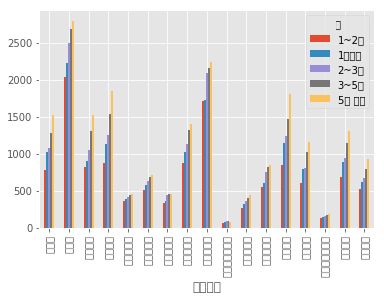

In [37]:
pd.crosstab(data['광역시도'],data['년'], data['수'], aggfunc='count').plot.bar()

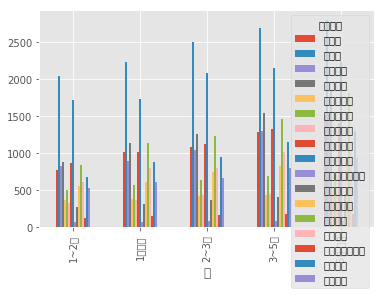

In [38]:
pd.crosstab(data['년'], data['광역시도'], data['수'], aggfunc='count').plot.bar()

groupby로 했을 때
- SCI
- stack() (컬럼을 인덱스로)
- unstack() (인덱스를 컬럼으로)

In [197]:
data.groupby(['년', '광역시도']).count().unstack()

시군구                                                          ...  \
광역시도    강원도   경기도  경상남도  경상북도 광주광역시 대구광역시 대전광역시 부산광역시 서울특별시 세종특별자치시  ...   
년                                                                    ...   
1~2년    779  2041   821   876   363   509   330   873  1718      68  ...   
1년미만   1023  2229   898  1136   383   574   365  1021  1728      73  ...   
2~3년   1082  2502  1049  1260   418   632   437  1128  2090      89  ...   
3~5년   1284  2687  1307  1539   439   686   451  1326  2158      86  ...   
5년 이상  1523  2798  1530  1853   455   711   457  1406  2239      85  ...   

          수                                                           
광역시도  부산광역시 서울특별시 세종특별자치시 울산광역시 인천광역시  전라남도  전라북도 제주특별자치도  충청남도 충청북도  
년                                                                     
1~2년    873  1718      68   268   553   847   607     131   684  527  
1년미만   1021  1728      73   320   606  1141   800     152   887  615  
2~3년   1128  2090      89   362   753  1236   805     165   943  670  
3~5년   1326  2158      86   405   827  1466  1019     174  1148  800  
5년 이상  1406  2239      85   443   847  1810  1166     184  1307  931  

[5 rows x 68 columns]

pivot_table
- margine을 사용할 수 있다.
- 전체 통계?값 - 아래 테이블에서는 All값

판다스에서 디폴트값이 있어도 값을 넣게 강제시킨, 안 넣으면 에러가 발생하게 만든 함수가 있다.

In [40]:
data.pivot_table('수','년', aggfunc='count', margins=True)

,수
년,
1~2년,11995
1년미만,13951
2~3년,15621
3~5년,17802
5년 이상,19745
All,79114


#### 그래프 이쁘게 그리는 도구 설치
- pdvega : 문법을 몰라도 그래프를 그릴 수 있다.

In [204]:
!pip install pdvega

  Stored in directory: C:\Users\재은\AppData\Local\pip\Cache\wheels\64\67\6c\3faafbf516d2bdfab7b3efc6e5db7dcf8dce060ea9da8fbe62
  Stored in directory: C:\Users\재은\AppData\Local\pip\Cache\wheels\bb\d1\fa\c1f13e071650f6dd9c6b986b7ee4d19dbfc7bc32a902593d39
Successfully built pdvega vega3


In [206]:
b = pd.crosstab(data['년'], data['광역시도'], data['수'], aggfunc='count')

import pdvega하면 몽키패치로 vgplot이 생긴다.

In [208]:
import pdvega

C:\Anaconda\Anaconda3\lib\site-packages\pdvega\_core.py:625: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  "type": infer_vegalite_type(df[x], ordinal_threshold=50)
C:\Anaconda\Anaconda3\lib\site-packages\pdvega\_core.py:629: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  "type": infer_vegalite_type(df["value"], ordinal_threshold=0),
C:\Anaconda\Anaconda3\lib\site-packages\pdvega\_core.py:634: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  "type": infer_vegalite_type(df["variable"])


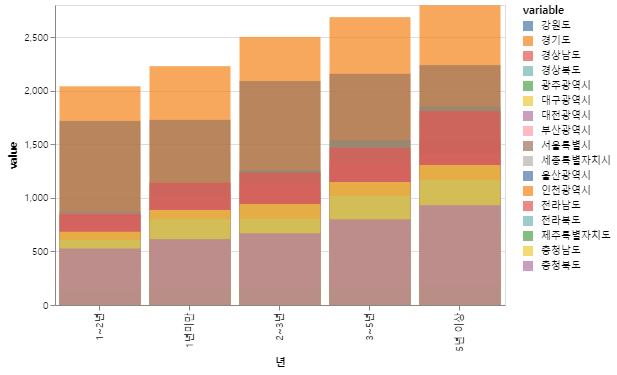

In [209]:
b.vgplot.bar()

C:\Anaconda\Anaconda3\lib\site-packages\pdvega\_core.py:625: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  "type": infer_vegalite_type(df[x], ordinal_threshold=50)
C:\Anaconda\Anaconda3\lib\site-packages\pdvega\_core.py:629: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  "type": infer_vegalite_type(df["value"], ordinal_threshold=0),
C:\Anaconda\Anaconda3\lib\site-packages\pdvega\_core.py:634: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  "type": infer_vegalite_type(df["variable"])


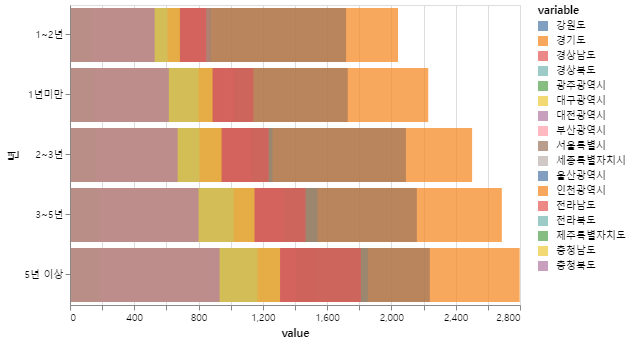

In [215]:
b.vgplot.barh()